<a href="https://colab.research.google.com/github/CindyMG/Core_w2/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_09_Cindy_Gachuhi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing python libraries

In [1]:
#let us import the necessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

From the following dataset, we will acquire the necessary data to conduct our analysis:
http://bit.ly/FinancialDataset 

In [2]:
#let us create a dataframe from the following url:
# http://bit.ly/FinancialDataset 
#
FinAccess_df = pd.read_csv("http://bit.ly/FinancialDataset")
FinAccess_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# **Cleaning our dataset**

1. Removing null values

In [3]:
#let us check for any null values or missing data
#
FinAccess_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [8]:
#now that we have identified the presence of null values, we will drop them 
FinAccess_df.dropna(inplace=True)
FinAccess_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
#confirm that all the null values have been removed from the dataset
#
FinAccess_df.isnull().sum()

#Great! All the null values have been cleaned out

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [12]:
#now let us check how many rows we have left after cleaning out the null values
FinAccess_df.shape

(23343, 13)

Dealing with outliers

In [14]:
#let us find out the descriptive statistics
FinAccess_df.describe()

,year,household_size,Respondent Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [15]:
# next, we will create a boxplot to get a visual of the outliers
#let us define function , 'plot_boxplot'
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

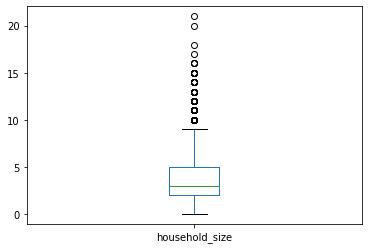

In [16]:
#now that we have defined the function, let us call it
#for the column 'household_size'
plot_boxplot(FinAccess_df, "household_size")

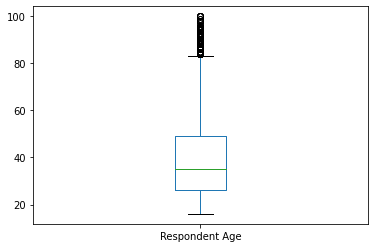

In [17]:
#for the column 'respondent_age'
plot_boxplot(FinAccess_df, "Respondent Age")

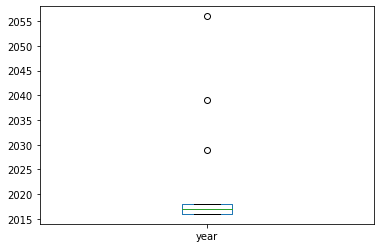

In [18]:
#for the column 'year'
plot_boxplot(FinAccess_df, "year")

In [22]:
#we are going to define the function 'outliers'
#with the lower and upper bounds, we create a range 
#that defines that any value outside that give range is an outlier
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
  return ls

In [23]:
#create an empty list to store the outlier indexes from the rows
index_list = []
for column in ['year', 'household_size', 'Respondent Age']:
  index_list.extend(outliers(FinAccess_df, column))

In [24]:
index_list

[213,
 308,
 7014,
 34,
 58,
 92,
 100,
 348,
 372,
 380,
 507,
 547,
 607,
 674,
 838,
 879,
 931,
 949,
 1056,
 1148,
 1327,
 1403,
 1486,
 1493,
 1507,
 1591,
 1599,
 1790,
 1838,
 1893,
 1933,
 1999,
 2085,
 2109,
 2121,
 2169,
 2176,
 2207,
 2290,
 2373,
 2436,
 2477,
 2503,
 2533,
 2593,
 2599,
 2648,
 2715,
 2726,
 2805,
 2847,
 2879,
 2886,
 2911,
 2974,
 2979,
 2988,
 3030,
 3044,
 3081,
 3086,
 3171,
 3224,
 3281,
 3289,
 3370,
 3420,
 3462,
 3468,
 3481,
 3486,
 3597,
 3691,
 3770,
 3849,
 3912,
 3979,
 4045,
 4078,
 4158,
 4189,
 4198,
 4224,
 4343,
 4392,
 4395,
 4405,
 4479,
 4510,
 4582,
 4842,
 4961,
 5014,
 5023,
 5078,
 5087,
 5110,
 5147,
 5152,
 5222,
 5225,
 5244,
 5257,
 5307,
 5387,
 5402,
 5414,
 5416,
 5537,
 5640,
 5676,
 5765,
 5784,
 6051,
 6076,
 6119,
 6163,
 6221,
 6281,
 6417,
 6460,
 6608,
 6628,
 6651,
 6694,
 6719,
 6809,
 6966,
 6981,
 6993,
 7064,
 7346,
 7414,
 7457,
 7497,
 7527,
 7561,
 7672,
 7722,
 8096,
 8341,
 8352,
 8367,
 8463,
 8606,
 8766

In [26]:
#define function 'remove' to clean out the outliers
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [27]:
df_cleaned = remove(FinAccess_df, index_list)

In [28]:
df_cleaned.shape

(22725, 13)

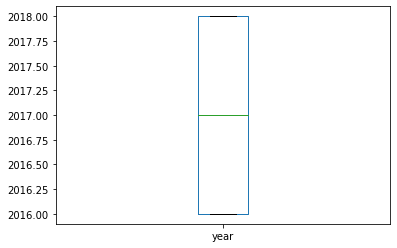

In [29]:
plot_boxplot(df_cleaned, 'year')

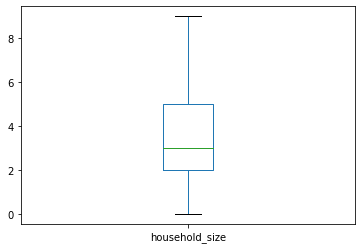

In [30]:
plot_boxplot(df_cleaned, 'household_size')

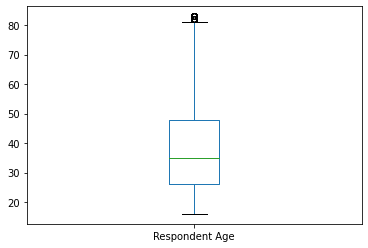

In [31]:
plot_boxplot(df_cleaned, 'Respondent Age')

In [33]:
df_cleaned.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# **Univariate analysis**

In [ ]:
# now, let us study the variable 'Has no bank account' more closely
# How many people have bank accounts?
# we will plot a pie chart to conduct our analysis


# **Bivariate analysis**

In [ ]:
df_cleaned[['year', 'racing', 'electric']].plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Sales of Hybrid, Racing and Electric Bikes (May 2017 - May 18)", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Sales", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Months", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()